In [1]:
import numpy as np
import fitsio
import healpy as hp
import matplotlib.pyplot as plt
import Config

In [2]:
res = 4096 # Resolution of the heal pixels
numBins = 10 # Number of bins to use
perVar = 0.98 # Percent of the variance to be captured
perMap = 0.625 # Percent of the PC maps to use, adjust this later

In [3]:
realFile = '/hdfs/bechtol/balrog/y3/y3_gold_2_2_DES0129-5248.fits'

In [4]:
realData = fitsio.read(realFile, columns = ['RA', 'DEC'])

In [5]:
minRA = np.min(realData['RA'])
maxRA = np.max(realData['RA'])
ranRA = maxRA - minRA

minDEC = np.min(realData['DEC'])
maxDEC = np.max(realData['DEC'])
ranDEC = maxDEC - minDEC

In [6]:
angles = np.meshgrid(np.linspace(minRA, maxRA, 2000), np.linspace(minDEC, maxDEC, 2000))

In [7]:
angles[0] = angles[0].flatten()
angles[1] = angles[1].flatten()

In [8]:
realPIX = np.unique(hp.ang2pix(res, angles[0], angles[1], lonlat = True, nest = True))

In [9]:
condFiles = Config.files

condData = fitsio.read(condFiles[Config.exptimeSUMr]) # This reads in the data
condSigExt = np.full(12*(4096**2), -1.6375e+30) # Gives a default value
condSigExt[condData['PIXEL']] = condData['SIGNAL'] # Changes all valid pixels to their corresponding signals
condSigExt[np.where(condSigExt == -1.6375e+30)[0]] = hp.UNSEEN # Masks all non valid pixels
if res != 4096:
    condSigExt=hp.ud_grade(condSigExt, res) # Only degrades if necessary (this is very time consuming)
condMapTile = condSigExt[realPIX]
condMapExt = condSigExt[np.where(condSigExt > 0)[0]]

In [10]:
print(np.average(condMapTile))
print(np.std(condMapTile))

363.1092011708508
87.42087376425805


In [11]:
print(np.average(condMapExt))
print(np.std(condMapExt))

331.6276284570052
111.91508583667732


In [12]:
pixAng = hp.pix2ang(res, realPIX, lonlat = True, nest = True)

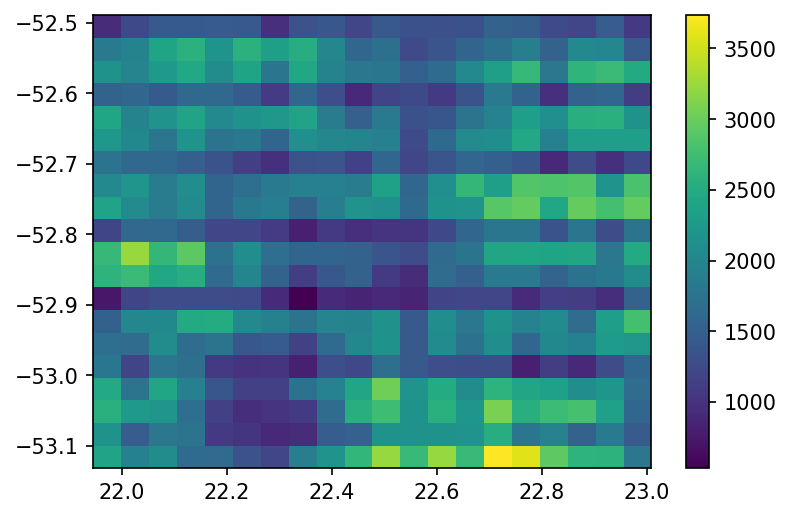

In [15]:
plt.figure(dpi = 150)
plt.hist2d(pixAng[0], pixAng[1], weights = condMapTile, bins = (np.linspace(minRA + 0.05 * ranRA, maxRA - 0.05 * ranRA, 21), np.linspace(minDEC + 0.05 * ranDEC, maxDEC - 0.05 * ranDEC, 21)))
plt.colorbar()
plt.show()